<a href="https://colab.research.google.com/github/peter90079/BMI/blob/master/Cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
# y = wx + b
x = data["YearsExperience"]
y = data["Salary"]


In [ ]:
w = 10
b = 0

y_pred = w*x + b
cost = (y-y_pred)**2
cost.sum() / len(x)

In [4]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y-y_pred)**2
  return cost.sum() / len(x)


In [ ]:
compute_cost(x, y, 10, 10)

In [ ]:
# b = 0 w = -100~100

costs = []

for w in range(-100, 100):
  cost = compute_cost(x, y, w, b)
  costs.append(cost)

costs

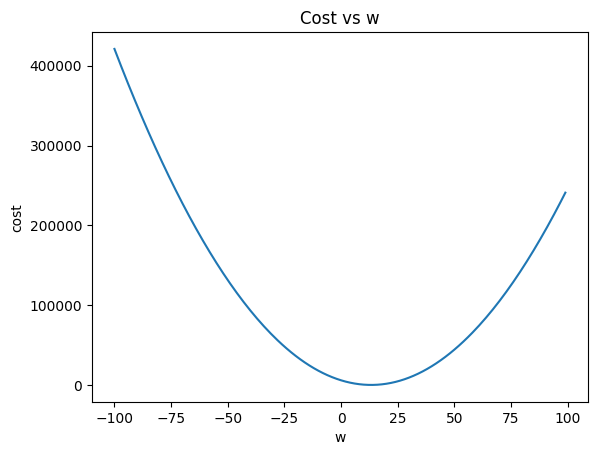

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(-100, 100), costs)
plt.xlabel("w")
plt.ylabel("cost")
plt.title("Cost vs w")
plt.show()

In [23]:
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201,201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i, j] = cost
    j += 1
  i += 1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

In [27]:
!pip install wget

import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7cddc282f6824c6ef2e0f20c55912a6e61cb21520852803ee5c343f8cb56b48a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

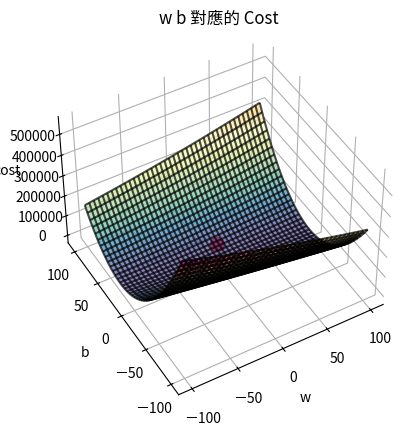

當w=[9],b=[29] 會有最小cost=[32.69484848]


In [39]:
plt.figure(figure=(7,7))
ax = plt.axes(projection="3d")
ax.view_init(45, -120)
ax.xaxis.set_pane_color((1, 1, 1))
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))
plt.title("Cost vs w and b")

b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(b_grid, w_grid, costs, cmap= "Spectral_r", alpha=0.7)
ax.plot_wireframe(b_grid, w_grid, costs, color="black", alpha=0.7)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
ax.set_title("w b 對應的 Cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=100)

plt.show()

print(f"當w={ws[w_index]},b={bs[b_index]} 會有最小cost={costs[w_index, b_index]}")